In [1]:
import os
os.chdir("/content/drive/MyDrive/Audio Analysis with Librosa")

In [ ]:
# %downloading datasets from kaggle

# %install kagggle library
! pip install kaggle --upgrade

# %creating .kaggle dir
! mkdir ~/.kaggle

# %Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/kaggle.json

# %allocating permission .kaggle dir
! chmod 600 ~/.kaggle/kaggle.json

# %downloading datasets from kaggle
! kaggle datasets download -d mmoreaux/audio-cats-and-dogs

mkdir: cannot create directory ‘/root/.kaggle’: File exists
audio-cats-and-dogs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# %since downloaded dataset are zipped we should consider extracting zip file
! unzip audio-cats-and-dogs.zip

Archive:  audio-cats-and-dogs.zip
  inflating: cats_dogs/cat_1.wav     
  inflating: cats_dogs/cat_10.wav    
  inflating: cats_dogs/cat_100.wav   
  inflating: cats_dogs/cat_101.wav   
  inflating: cats_dogs/cat_102.wav   
  inflating: cats_dogs/cat_103.wav   
  inflating: cats_dogs/cat_105.wav   
  inflating: cats_dogs/cat_106.wav   
  inflating: cats_dogs/cat_107.wav   
  inflating: cats_dogs/cat_108.wav   
  inflating: cats_dogs/cat_109.wav   
  inflating: cats_dogs/cat_11.wav    
  inflating: cats_dogs/cat_110.wav   
  inflating: cats_dogs/cat_112.wav   
  inflating: cats_dogs/cat_113.wav   
  inflating: cats_dogs/cat_114.wav   
  inflating: cats_dogs/cat_115.wav   
  inflating: cats_dogs/cat_116.wav   
  inflating: cats_dogs/cat_117.wav   
  inflating: cats_dogs/cat_118.wav   
  inflating: cats_dogs/cat_119.wav   
  inflating: cats_dogs/cat_12.wav    
  inflating: cats_dogs/cat_120.wav   
  inflating: cats_dogs/cat_121.wav   
  inflating: cats_dogs/cat_122.wav   
  inflating: cat

In [2]:
# import librosa
import librosa

In [3]:
# %load dog audio
import IPython.display as ipd
ipd.Audio('cats_dogs/train/dog/dog_barking_87.wav')

In [4]:
# %load cat audio
ipd.Audio('cats_dogs/train/cat/cat_125.wav')

**Using Librosa to load datasets**

In [5]:
data, sampling_rate = librosa.load('cats_dogs/train/cat/cat_125.wav')

When you load the data, it gives you two objects; a numpy array of an audio file and the corresponding sampling rate by which it was extracted. Now to represent this as a waveform using librosa.display.waveplot function

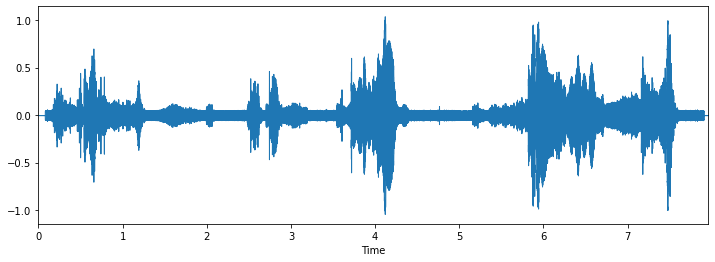

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()

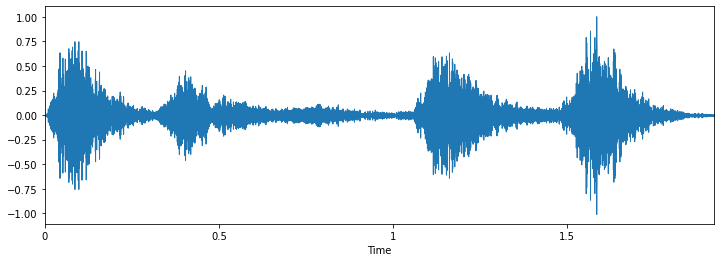

In [ ]:
# %waveform represenation for dog audio
data, sampling_rate = librosa.load('cats_dogs/train/dog/dog_barking_87.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()

Let's try to map the audio from the time domain to the frequency domain using the fast Fourier transform , since an audio signal is comprised of several single-frequency sound waves. The aim of using Fourier transform to converts the signal from the time domain into the frequency domain. This process will lead us to obtain something called spectrum

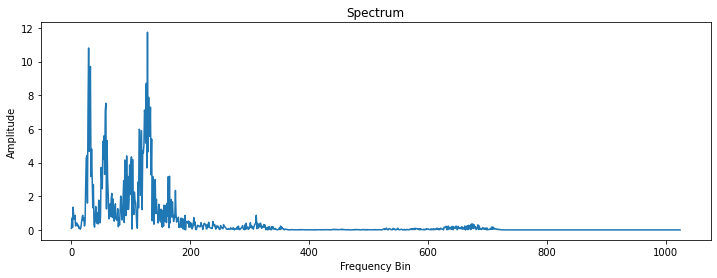

In [ ]:
n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

Time-Amplitude Represenation

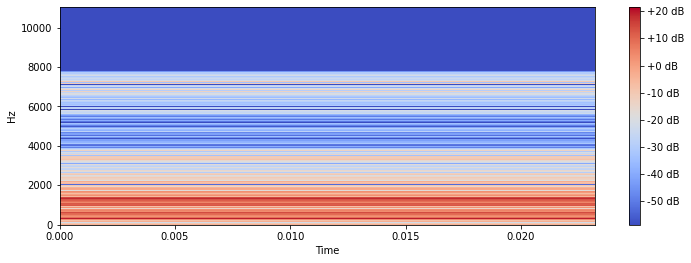

In [ ]:
n_fft = 2048
S = librosa.amplitude_to_db(abs(ft))
plt.figure(figsize=(12, 4))
librosa.display.specshow(S, sr=sampling_rate, hop_length=512, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

Mel Frequency Cepstral Coefficients (MFCCs)

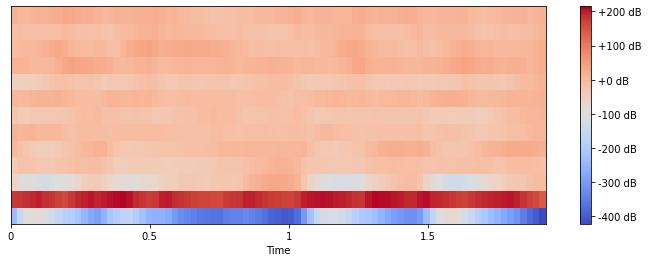

In [ ]:
plt.figure(figsize=(12, 4))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=13) #computed MFCCs over frames.
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()
